In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# cargar archivo
df = pd.read_csv('C:/Users/Lenovo/Downloads/2023-2024-ET_CALCULADA_CAJEME.csv', encoding='latin1')
df

,Día,Tmax,Tmin,HR,Ux,Rs,Pef,Tmean,es,ea,...,gamma,Rns,Rnl,Rn,ET0,Kc,ETc,decada,ETverde,ETazul
0,303,34.06,19.88,45.57,2.51,19.50,0.0,26.970,3.829012,1.744881,...,0.066528,15.0150,5.418102,9.596898,5.605669,0.30,1.681701,1,0.0,1.681701
1,304,33.74,19.63,42.91,2.06,19.16,0.0,26.685,3.763998,1.615132,...,0.066528,14.7532,5.485365,9.267835,5.213102,0.30,1.563931,1,0.0,1.563931
2,305,33.98,19.11,39.63,2.28,18.82,0.0,26.545,3.762929,1.491249,...,0.066528,14.4914,5.549216,8.942184,5.522913,0.30,1.656874,1,0.0,1.656874
3,306,36.95,20.54,34.19,2.11,18.59,0.0,28.745,4.337671,1.483050,...,0.066528,14.3143,5.612498,8.701802,5.853711,0.30,1.756113,1,0.0,1.756113
4,307,36.80,22.97,32.88,1.75,18.31,0.0,29.885,4.505563,1.481429,...,0.066528,14.0987,5.547466,8.551234,5.430888,0.30,1.629266,1,0.0,1.629266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,105,34.37,19.27,24.69,3.75,25.04,0.0,26.820,3.832254,0.946184,...,0.066528,19.2808,3.878937,15.401863,9.658978,0.25,2.414745,17,0.0,2.414745
168,106,34.38,19.02,30.59,4.67,27.33,0.0,26.700,3.816490,1.167464,...,0.066528,21.0441,4.154818,16.889282,10.289567,0.25,2.572392,17,0.0,2.572392
169,107,32.78,16.71,28.74,3.49,26.56,0.0,24.745,3.435405,0.987335,...,0.066528,20.4512,4.111962,16.339238,8.922740,0.25,2.230685,17,0.0,2.230685
170,108,34.87,19.12,22.72,2.36,29.45,0.0,26.995,3.898152,0.885660,...,0.066528,22.6765,5.186990,17.489510,8.847847,0.25,2.211962,18,0.0,2.211962


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Día      172 non-null    int64  
 1   Tmax     172 non-null    float64
 2   Tmin     172 non-null    float64
 3   HR       172 non-null    float64
 4   Ux       172 non-null    float64
 5   Rs       172 non-null    float64
 6   Pef      172 non-null    float64
 7   Tmean    172 non-null    float64
 8   es       172 non-null    float64
 9   ea       172 non-null    float64
 10  delta    172 non-null    float64
 11  P        172 non-null    float64
 12  gamma    172 non-null    float64
 13  Rns      172 non-null    float64
 14  Rnl      172 non-null    float64
 15  Rn       172 non-null    float64
 16  ET0      172 non-null    float64
 17  Kc       172 non-null    float64
 18  ETc      172 non-null    float64
 19  decada   172 non-null    int64  
 20  ETverde  172 non-null    float64
 21  ETazul   172 non

### Correlación y Dispersión

<div class="alert alert-info">

### Alta Correlación entre las variables climáticas: Tmáx y Rs  y ET₀.
### Caso contrario, con la HR

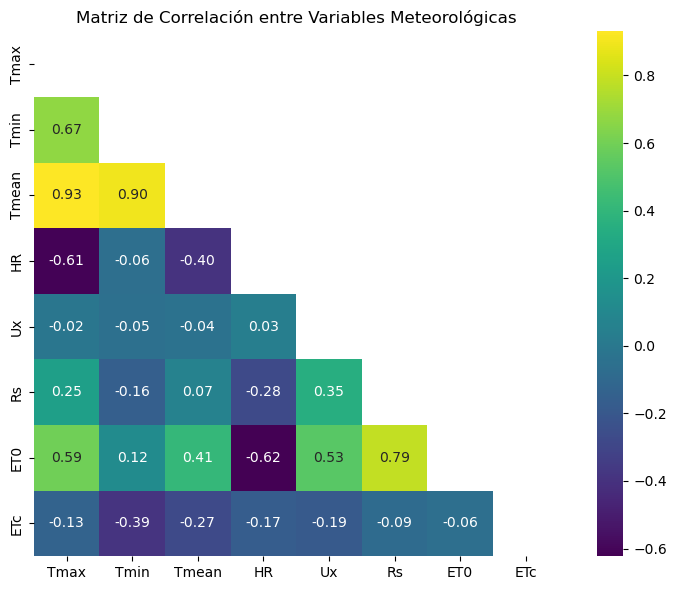

In [44]:
from scipy.signal import correlate

variables = ['Tmax', 'Tmin', 'Tmean', 'HR', 'Ux', 'Rs', 'ET0', 'ETc']
df_selected = df[variables].dropna()
corr_matrix = df_selected.corr()

plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", square=True, mask=mask) 
plt.title("Matriz de Correlación entre Variables Meteorológicas")
plt.tight_layout()

<div class="alert alert-info">

### Dispersión de las variables meteorológicas: 'Tmax', 'HR', 'Ux', 'Rs', 'ETc' vs 'ET0'
### 1) Relación directa 2) Alta correlación 3) Relación inversa 4) Dispersión: el viento acelera la pérdida de agua 5) Relación directa: ETc = ET0 x Coeficiente de cultivo
    
    

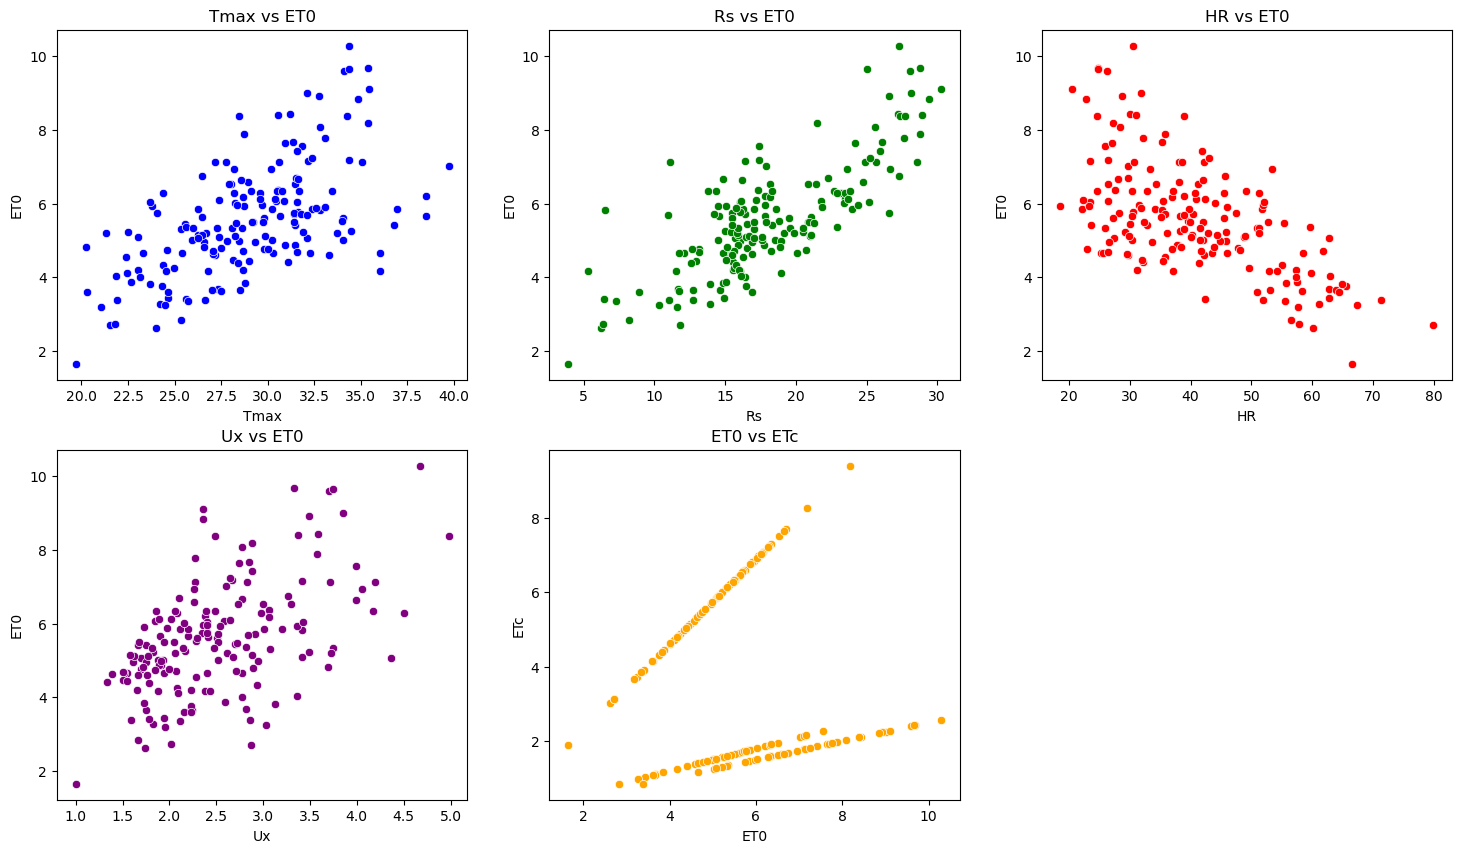

In [38]:

# variables
variables = ['Tmax', 'HR', 'Ux', 'Rs', 'ET0', 'ETc']
df_selected = df[variables]

# plot 
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.scatterplot(x='Tmax', y='ET0', data=df_selected, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Tmax vs ET0')

sns.scatterplot(x='Rs', y='ET0', data=df_selected, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Rs vs ET0')

sns.scatterplot(x='HR', y='ET0', data=df_selected, ax=axes[0, 2], color='red')
axes[0, 2].set_title('HR vs ET0')

sns.scatterplot(x='Ux', y='ET0', data=df_selected, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Ux vs ET0')

sns.scatterplot(x='ET0', y='ETc', data=df_selected, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('ET0 vs ETc')

fig.delaxes(axes[1, 2])

## Modelo Lineal y Random Forest

<div class="alert alert-info">

### Regresión Lineal entre las variables climáticas: 'Tmax', 'Tmin', 'HR', 'Ux', 'Rs' y la regresora ET0.
### El modelo explica bien la variabilidad de ET0 y el Error cuadrático es bajo.

Valor del R²: 0.9414
Valor del MSE: 0.1239


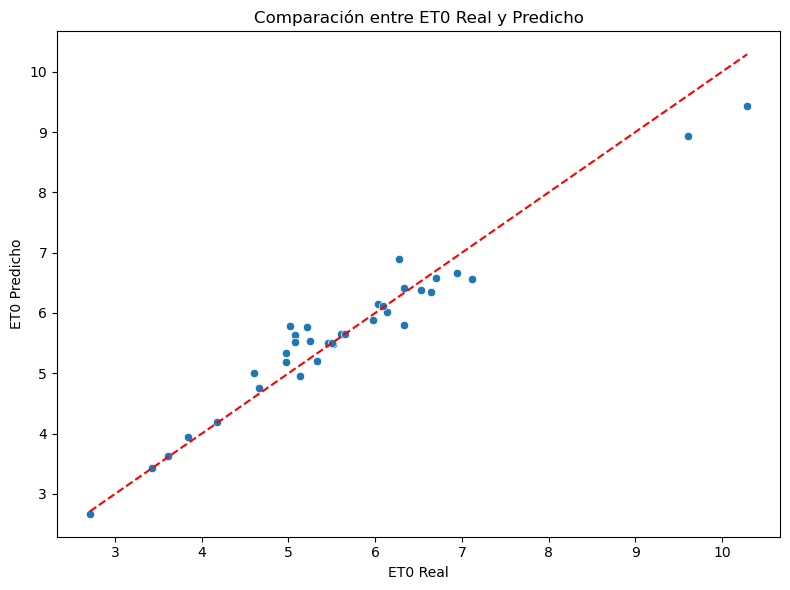

In [4]:

# variables 
features = ['Tmax', 'Tmin', 'HR', 'Ux', 'Rs']
target = 'ET0'
df_model = df[features + [target]].dropna()

# entrenamiento y prueba
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# predicciones
y_pred = model.predict(X_test)

# evaluación del modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Valor del R²: {r2:.4f}")
print(f"Valor del MSE: {mse:.4f}")

# plot de predicción vs valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('ET0 Real')
plt.ylabel('ET0 Predicho')
plt.title('Comparación entre ET0 Real y Predicho')
plt.tight_layout()


<div class="alert alert-info">

### Random Forest logra capturar relaciones no lineales entre las variables climáticas y ET0.
### Rs y Tmax, principales impulsores de la predicción, lo cual es coherente con la fisiología del proceso de evapotranspiración, al aumentar la energía disponible para vaporizar el agua. 

In [6]:
from sklearn.ensemble import RandomForestRegressor

# variables
X = df[['Tmax', 'Tmin', 'HR', 'Ux', 'Rs']]
y = df['ET0']

# dividir datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo y ajuste
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predicción y evaluación
y_pred = rf.predict(X_test)
print("Valor del R²:", r2_score(y_test, y_pred))
print("Valor del MSE:", mean_squared_error(y_test, y_pred))
print("Valor de las variables de importancia:", rf.feature_importances_)

Valor del R²: 0.8947913636248135
Valor del MSE: 0.2221860122803121
Valor de las variables de importancia: [0.07289151 0.01424047 0.25030306 0.07683782 0.58572714]


## Agrupamientos

<div class="alert alert-info">

### Con K-Medias se sugirieron 5 clústeres para una segmentación (patrones) óptima entre días cálidos-secos (alta demanda hídrica), días frescos-húmedos, entre otros.

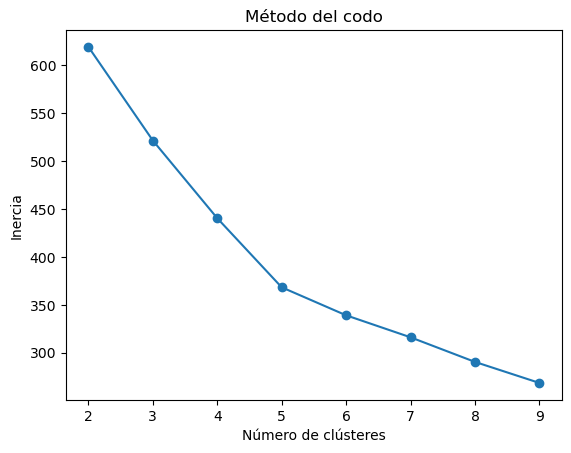

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# variables
X = df[['Tmax', 'Tmin', 'HR', 'Ux', 'Rs']].dropna()

# escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# determinar número óptimo de clústeres y método del codo
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clústeres")
plt.ylabel("Inercia")
plt.show()


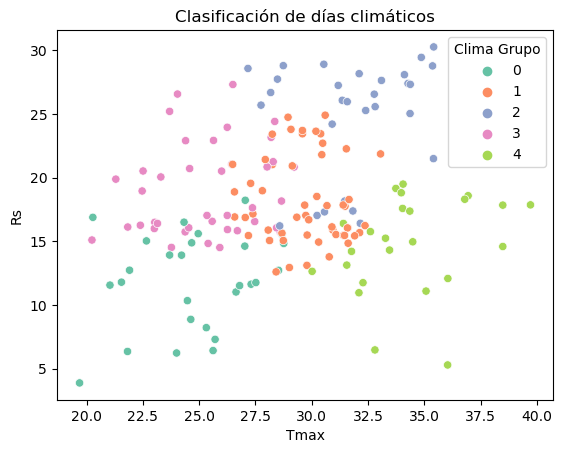

In [41]:
# ajuste, predicción y agrupamiento
k_final = 5
km = KMeans(n_clusters=k_final, random_state=42)
df['Clima Grupo'] = km.fit_predict(X_scaled)

# plot
sns.scatterplot(data=df, x='Tmax', y='Rs', hue='Clima Grupo', palette='Set2')
plt.title("Clasificación de días climáticos")
plt.show()

In [25]:
df.groupby('Clima Grupo')['Tmax'].describe()

,count,mean,std,min,25%,50%,75%,max
Clima Grupo,,,,,,,,
0,27.0,24.774074,2.580840,19.69,23.1750,24.67,26.9150,28.76
1,53.0,29.749623,1.672846,26.49,28.4200,29.80,31.0800,33.06
2,29.0,31.798966,2.435874,27.17,30.5400,31.83,34.1200,35.42
3,39.0,25.322051,2.323907,20.24,23.4950,25.58,27.0350,29.22
4,24.0,34.316250,2.479093,30.02,32.5275,34.01,36.0425,39.72


In [69]:
dias_por_grupo = {
    k: df[df['Clima Grupo'] == k]['Día'].tolist()
    for k in sorted(df['Clima Grupo'].unique())
}
dias_por_grupo

{0: [328,
  329,
  330,
  331,
  332,
  333,
  334,
  335,
  346,
  347,
  354,
  357,
  1,
  4,
  21,
  22,
  23,
  24,
  32,
  33,
  37,
  39,
  40,
  41,
  58,
  59,
  91],
 1: [315,
  316,
  338,
  339,
  340,
  341,
  342,
  343,
  344,
  345,
  348,
  349,
  350,
  351,
  361,
  362,
  363,
  364,
  365,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  27,
  28,
  31,
  35,
  36,
  45,
  46,
  48,
  49,
  50,
  51,
  54,
  56,
  61,
  62,
  63,
  64,
  65,
  66,
  70,
  71,
  72,
  73,
  78,
  80,
  83],
 2: [314,
  324,
  325,
  326,
  337,
  55,
  77,
  79,
  81,
  82,
  87,
  88,
  89,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109],
 3: [323,
  327,
  336,
  358,
  359,
  360,
  2,
  3,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  25,
  26,
  34,
  38,
  42,
  43,
  44,
  47,
  52,
  53,
  60,
  67,
  68,
  69,
  74,
  75,
  76,
  84,
  85,
  86,
  90,
  92,
  93],
 4: [303,
  304,
  305,
  306,
  307,
  308,
  309,
 

In [70]:
dias_grupo_0 = df[df['Clima Grupo'] == 0]
dias_grupo_0

,Día,Tmax,Tmin,HR,Ux,Rs,Pef,Tmean,es,ea,...,Rnl,Rn,ET0,Kc,ETc,decada,ETverde,ETazul,Clima Grupo,cluster
25,328,27.31,17.99,62.82,2.82,11.64,0.00,22.650,2.846695,1.788294,...,1.772032,7.190768,3.681477,0.30,1.104443,3,0.00,1.104443,0,0
26,329,27.03,17.55,63.99,2.24,14.63,0.00,22.290,2.788964,1.784658,...,2.706548,8.558552,3.658958,0.30,1.097687,3,0.00,1.097687,0,0
27,330,25.32,16.39,56.51,1.67,8.23,0.00,20.855,2.546371,1.438954,...,0.695583,5.641517,2.836179,0.30,0.850854,3,0.00,0.850854,0,0
28,331,28.53,16.63,53.07,1.75,12.73,0.00,22.580,2.895457,1.536619,...,2.237854,7.564246,3.652564,0.30,1.095769,3,0.00,1.095769,0,0
29,332,28.76,17.77,55.72,1.73,14.84,0.00,23.265,2.992392,1.667361,...,2.838172,8.588628,3.838822,0.30,1.151647,3,0.00,1.151647,0,0
30,333,27.52,17.26,58.42,2.22,11.77,0.00,22.390,2.822726,1.649037,...,1.779425,7.283475,3.615996,0.30,1.084799,4,0.00,1.084799,0,0
31,334,24.67,16.09,62.82,1.94,14.89,0.00,20.380,2.467403,1.550023,...,2.794259,8.671041,3.431693,0.30,1.029508,4,0.00,1.029508,0,0
32,335,24.22,14.81,61.22,1.83,13.92,0.00,19.515,2.354072,1.441163,...,2.508947,8.209453,3.271043,0.30,0.981313,4,0.00,0.981313,0,0
43,346,26.64,16.94,52.00,1.59,11.03,0.00,21.790,2.710551,1.409487,...,1.337619,7.155481,3.381363,1.15,3.888568,5,0.00,3.888568,0,0
44,347,28.68,15.63,57.33,2.23,15.56,0.00,22.155,2.853976,1.636185,...,2.592062,9.389138,4.198704,1.15,4.828510,5,0.00,4.828510,0,0


### Formar nuevos clústeres agregando ET0, ETc y la mediana.

Estadísticas descriptivas por grupo:
              Tmax       Tmin         HR        Ux         Rs       ET0  \
              mean       mean       mean      mean       mean      mean   
cluster                                                                   
0        24.539687  14.823750  59.375625  2.265312  12.683438  3.568874   
1        31.780357  15.550357  30.910000  3.059643  25.645714  8.000009   
2        33.335938  19.440938  34.399062  2.279063  15.373750  5.456787   
3        28.741017  13.796610  35.955593  2.234915  17.782373  5.522345   
4        25.779048  14.125238  48.865238  3.265238  20.924286  5.697289   

              ETc  
             mean  
cluster            
0        3.265666  
1        2.037651  
2        1.875541  
3        6.350697  
4        1.890386  


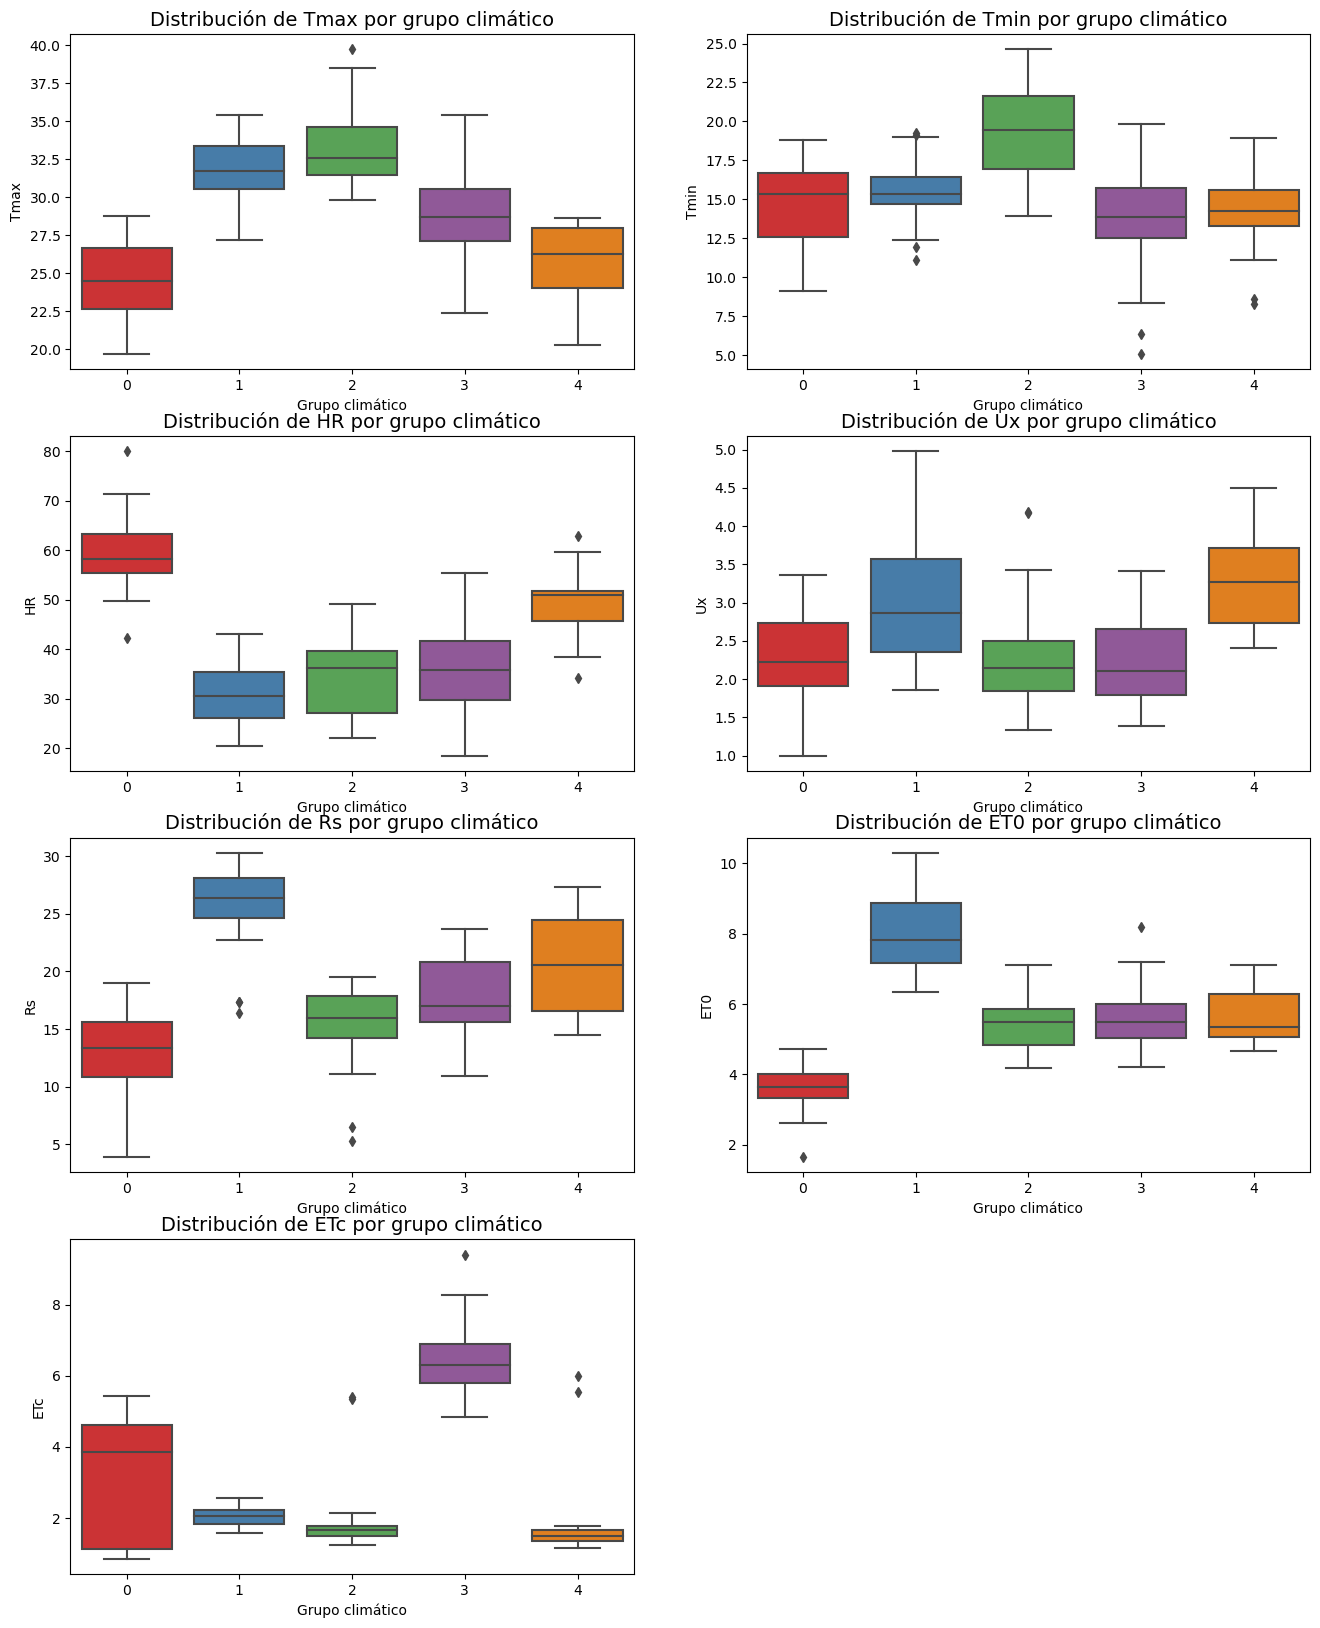

In [42]:

# agregando variables  ET0 y ETc  
variables = ['Tmax', 'Tmin', 'HR', 'Ux','Rs', 'ET0', 'ETc']
data = df[variables].dropna()

# escalar
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# agrupar a 5 clústeres
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

# estadísticas descriptivas por grupo
stats = df.groupby('cluster')[variables].agg(['mean'])
print("Estadísticas descriptivas por grupo:")
print(stats)

# boxplots 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(x='cluster', y=var, data=df, ax=axes[i], palette='Set1')
    axes[i].set_title(f'Distribución de {var} por grupo climático', fontsize=14)
    axes[i].set_xlabel('Grupo climático')
    axes[i].set_ylabel(var)

# quitar plot vacío
if len(variables) < len(axes):
    fig.delaxes(axes[-1])


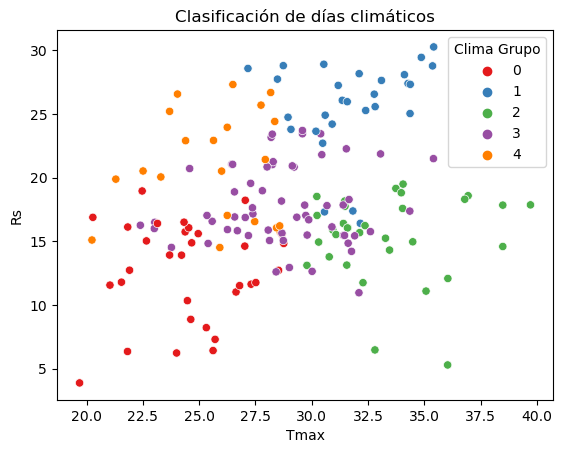

In [32]:
# ajuste, predicción y agrupamiento
k_final = 5
km = KMeans(n_clusters=k_final, random_state=42)
df['Clima Grupo'] = km.fit_predict(data_scaled)

# plot
sns.scatterplot(data=df, x='Tmax', y='Rs', hue='Clima Grupo', palette='Set1')
plt.title("Clasificación de días climáticos")
plt.show()

In [33]:
df.groupby('Clima Grupo')['Tmax'].describe()

,count,mean,std,min,25%,50%,75%,max
Clima Grupo,,,,,,,,
0,32.0,24.539687,2.464229,19.69,22.6125,24.510,26.6800,28.76
1,28.0,31.780357,2.210630,27.17,30.5275,31.705,33.3550,35.42
2,32.0,33.335938,2.673250,29.79,31.4550,32.590,34.6375,39.72
3,59.0,28.741017,2.734070,22.39,27.1200,28.680,30.5650,35.41
4,21.0,25.779048,2.496399,20.24,24.0400,26.250,27.9400,28.60
